In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import pingouin as pg
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('prevalence-by-mental-and-substance-use-disorder_new.csv')
df.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [4]:
#data_rus = df[df['Entity'] == 'Russia'].loc [:, 'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)':'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']
data_rus = df[df['Entity'] == 'Russia'].copy()
data_rus.rename(columns ={'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)':'Schizophrenia, %',
                          'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)':'Bipolar disorder, %',
                          'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)':'Eating disorders, %',
                          'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)':'Anxiety',
                          'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)':'Drug',
                          'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)':'Depression',
                          'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)':'Alcohol'},
                          inplace = True)
data_rus = data_rus.loc [:, 'Year':'Alcohol']
data_rus

,Year,"Schizophrenia, %","Bipolar disorder, %","Eating disorders, %",Anxiety,Drug,Depression,Alcohol
4860,1990,0.297650,0.546132,0.161922,3.368835,1.158101,3.444135,3.650886
4861,1991,0.297248,0.545923,0.159473,3.366418,1.195578,3.461373,3.654153
4862,1992,0.296835,0.545788,0.156935,3.364233,1.232454,3.475423,3.677310
4863,1993,0.296416,0.545762,0.154284,3.363235,1.267117,3.487437,3.711608
4864,1994,0.296017,0.545821,0.151824,3.363033,1.297654,3.497208,3.752854
4865,1995,0.295671,0.545929,0.149223,3.363198,1.323159,3.504938,3.797207
4866,1996,0.295282,0.546240,0.146140,3.363753,1.350315,3.509588,3.919494
4867,1997,0.294811,0.546829,0.142504,3.364939,1.382766,3.510591,4.146773
4868,1998,0.294364,0.547569,0.139228,3.366947,1.414574,3.508963,4.402743
4869,1999,0.294057,0.548278,0.136742,3.369019,1.439735,3.504760,4.612252


<AxesSubplot:xlabel='Year', ylabel='Alcohol'>

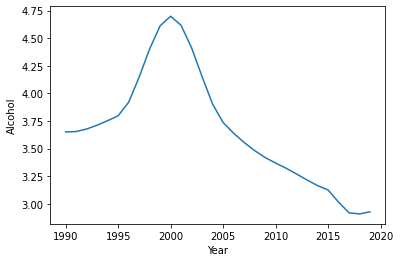

In [19]:
sns.lineplot(data=data_rus, y="Alcohol", x="Year")

<AxesSubplot:xlabel='Year', ylabel='Anxiety'>

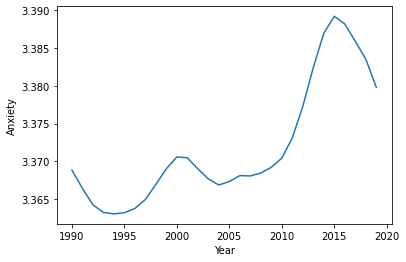

In [20]:
sns.lineplot(data=data_rus, y="Anxiety", x="Year")

[Text(0.5, 1.0, 'Изменение уровня депрессии в России в течение 30 лет')]

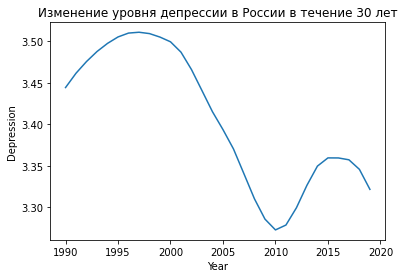

In [21]:
(sns.lineplot(data=data_rus, y="Depression", x="Year").set(title = "Изменение уровня депрессии в России в течение 30 лет"))

In [6]:
alco = list(data_rus['Alcohol'])
depr = list(data_rus['Depression'])
anx = list(data_rus['Anxiety'])

In [7]:
stats.bartlett(alco, depr, anx) #p < 0.05

BartlettResult(statistic=250.9890281504212, pvalue=3.150830407304068e-55)

In [8]:
stats.bartlett(alco, depr) #p < 0.05

BartlettResult(statistic=67.08754596263745, pvalue=2.5971391305978573e-16)

In [9]:
stats.bartlett(alco, anx) #p < 0.05

BartlettResult(statistic=197.63635477626804, pvalue=6.849315584522745e-45)

In [10]:
stats.bartlett(depr, anx) #p < 0.05

BartlettResult(statistic=92.97431231041217, pvalue=5.297749978396958e-22)

In [11]:
df1 = pd.DataFrame({'score': alco+depr+anx,
 'group': np.repeat(['alcohol', 'depression', 'anxiety'], repeats = len(alco) )}) #Анализ Уэлча
pg.welch_anova(dv='score', between='group', data=df1) #p<0.05

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,39.050204,7.396213,0.001889,0.166917


In [12]:
stats.f_oneway(alco, depr, anx)

F_onewayResult(statistic=8.715673406524825, pvalue=0.00035476784783054066)

In [13]:
stats.kruskal(alco, depr, anx)

KruskalResult(statistic=7.563174603174673, pvalue=0.022786493666746375)

In [14]:
#One-way Anova
mod = ols('Depression ~ Anxiety', data = data_rus).fit()
aov = sm.stats.anova_lm(mod, type = 2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
Anxiety,1.0,0.062953,0.062953,13.116923,0.001147
Residual,28.0,0.134382,0.004799,NaN,NaN


In [15]:
#Two-way Anova
mod1 = ols('Depression ~ Anxiety+Alcohol+Anxiety*Alcohol', data = data_rus).fit()
aov1 = sm.stats.anova_lm(mod1, type = 2)
aov1

,df,sum_sq,mean_sq,F,PR(>F)
Anxiety,1.0,0.062953,0.062953,51.527857,1.268131e-07
Alcohol,1.0,0.052851,0.052851,43.259884,5.648954e-07
Anxiety:Alcohol,1.0,0.049765,0.049765,40.733903,9.251172e-07
Residual,26.0,0.031765,0.001222,NaN,NaN


In [ ]:
mf = pd.read_csv('share-with-mental-or-substance-disorders-by-sex.csv')
mf[mf['Entity'] == 'Russia'].isnan()

In [24]:
nd = pd.read_csv('prevalence-by-mental-and-substance-use-disorder_new.csv')
nd[nd['Entity'] == 'Russia']

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
4860,Russia,RUS,1990,0.30,0.55,0.16,3.37,1.16,3.44,3.65
4861,Russia,RUS,1991,0.30,0.55,0.16,3.37,1.20,3.46,3.65
4862,Russia,RUS,1992,0.30,0.55,0.16,3.36,1.23,3.48,3.68
4863,Russia,RUS,1993,0.30,0.55,0.15,3.36,1.27,3.49,3.71
4864,Russia,RUS,1994,0.30,0.55,0.15,3.36,1.30,3.50,3.75
4865,Russia,RUS,1995,0.30,0.55,0.15,3.36,1.32,3.50,3.80
4866,Russia,RUS,1996,0.30,0.55,0.15,3.36,1.35,3.51,3.92
4867,Russia,RUS,1997,0.29,0.55,0.14,3.36,1.38,3.51,4.15
4868,Russia,RUS,1998,0.29,0.55,0.14,3.37,1.41,3.51,4.40
4869,Russia,RUS,1999,0.29,0.55,0.14,3.37,1.44,3.50,4.61
